### Modelo_tres. ( Mejorando modelo 0.2 )   OneHotEncoder & Normalizado & Desbalanceado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import numpy as np

import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from pylab import rcParams 

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [7]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [8]:
df['tipo_gestor_etiqueta'].value_counts()

0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64

In [9]:
df['tipo_gestor'].value_counts()

ASESOR FINANCIERO          403840
SIN GESTOR                  43144
SUBDIRECCIÓN DE OFICINA      4390
Name: tipo_gestor, dtype: int64

In [10]:
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp',
         'cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [11]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [12]:
df.head()

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,1,1328106.49,18287.0,14881.0,0.0,1301110.59,14304.39,1,1,1,...,0,1,0,0,1,0,0,0,0,1
1,2,1142234.34,18287.0,14881.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1142234.34,18287.0,28332.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,2,0,3,0,2,0,1
3,4,1340503.88,41475.0,14204.0,0.0,1076086.83,0.00,1,0,0,...,0,1,0,0,0,3,0,0,0,1
4,5,1758517.70,39000.0,14219.0,0.0,919297.29,109343.49,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [13]:
df.dtypes;

In [14]:
# Convierto variables a object
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [15]:
df.dtypes;

## Normalizamos

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
#con todos los datos numericos
df_datos_numericos =  df.select_dtypes('number')
#df_datos_numericos =  df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

In [19]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [20]:
columnas_datos_numericos = df_datos_numericos.columns

In [21]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [22]:
df_normalizado.head(2)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.258207,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
1,0.223408,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


## Modelo TREE 

In [23]:
# PASO 1
# Load the library
from sklearn.tree import DecisionTreeClassifier

In [186]:
#PASO 2 # Create an instance 
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,)

In [187]:
df_normalizado.columns

Index(['saldo_captacion', 'saldo_financiacion', 'saldo_ffii', 'saldo_plp',
       'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int',
       'edad', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [216]:
# X = df_normalizado  Con todas las variables sale siempre curva roc 1
X = df_normalizado[['saldo_captacion', 'saldo_financiacion',
       'lp_dom_ingresos','seg_recorrido_etiqueta']]
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 1805496 (451374, 4)
Datos y = 451374 (451374,)


In [217]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=100)

In [218]:
# Hacemos la prediccion. Segun ebumpiness","grado sale 1 o 0 si o no.
print(clf.predict(X))

[1 0 0 ... 0 0 0]


## Train-Test Split in Sklearn

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [221]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=100)

In [222]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [223]:
clf.predict_proba(X_test)[:, 1]

array([0.50149965, 0.62735533, 0.83925417, ..., 0.68075701, 0.68075701,
       0.0950951 ])

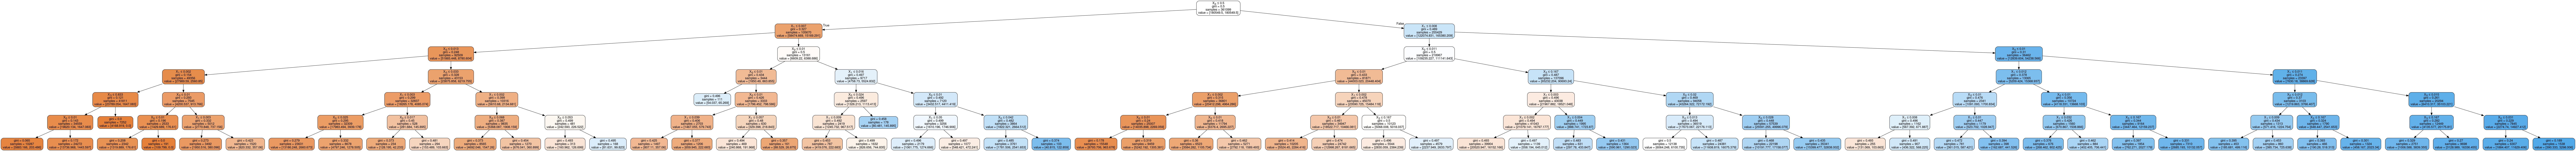

In [224]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 15000,width = 700)

## Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf = GridSearchCV(DecisionTreeClassifier(),
                    param_grid={"max_depth":np.arange(2,7),
                                "min_samples_leaf":[50,100,200]},
                    scoring="accuracy")
clf.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_leaf': [50, 100, 200]},
             scoring='accuracy')

In [36]:
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 100}

# Metrica

- Curva Roc

In [225]:
# Load the library
from sklearn.metrics import roc_curve

In [226]:
from sklearn.metrics import roc_curve, auc
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
auc(fp,tp)

0.7637262812678833

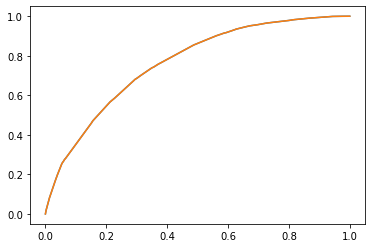

In [227]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

[[51074 27416]
 [ 3082  8703]]


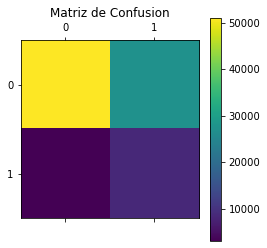

In [228]:
matriz_confusion_clf = confusion_matrix(y_test,clf.predict(X_test))
print(matriz_confusion_clf)
pl.matshow(confusion_matrix(y_test,clf.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [229]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,clf.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clf.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clf.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clf.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clf.predict(X_test)))

accuracy_score =  0.6621656050955415
precision = 0.24095351477061935
recall = 0.7384811200678829
f1_score = 0.36335170340681366
roc_auc_score = 0.7637262812678833
classification_report
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     78490
           1       0.24      0.74      0.36     11785

    accuracy                           0.66     90275
   macro avg       0.59      0.69      0.57     90275
weighted avg       0.85      0.66      0.72     90275

